# This notebook shows how to visualize how CO$_2$ density relates to pressure and temperature

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
import CoolProp.CoolProp as CP
pf.__version__

g:\my drive\berkeley_new\diadfit_outer\src\DiadFit\cosmicray_filter.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


'0.0.51'

### Calculations of CO$_2$ density as a function of pressure and temperature

In [2]:
# Make a linearly spaced vector of pressures, 
# we do 2 here to get a smoother curve and combine
P=np.linspace(100, 2000*10**6, 100)
Psmall=np.linspace(0, 100, 100)
P_combo=np.concatenate((Psmall, P))

# calculating for different temperatures 1300-1000 celcius
CalcD_P_1300=CP.PropsSI('D', 'P', P_combo, 'T', 1300+273.15, 'CO2')
CalcD_P_1200=CP.PropsSI('D', 'P', P_combo, 'T', 1200+273.15, 'CO2')
CalcD_P_1100=CP.PropsSI('D', 'P', P_combo, 'T', 1100+273.15, 'CO2')
CalcD_P_1000=CP.PropsSI('D', 'P', P_combo, 'T', 1000+273.15, 'CO2')

### Some things to allow us to plot in pressure vs. depth space

In [3]:
rho=2700 # Crustal density
P_axis_min=0
P_axis_max=20
D_axis_min=100000*P_axis_min/(9.8*rho)
D_axis_max=100000*P_axis_max/(9.8*rho)

### Now lets make a pretty plot showing this

Text(0.5, 0, 'Pressure (kbar)')

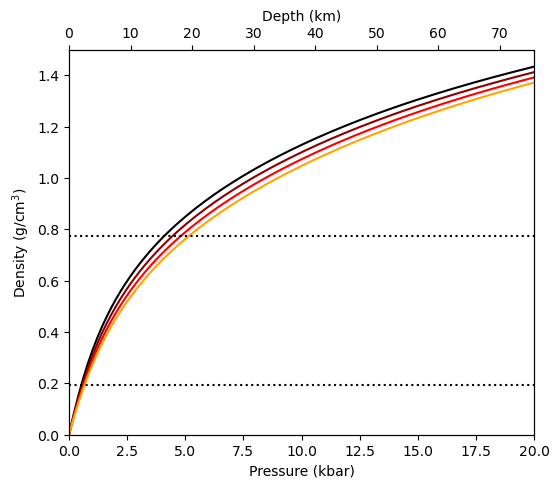

In [4]:
fig, (ax4) = plt.subplots(1, 1, figsize=(6,5))



ax5 = ax4.twiny()
ax4.plot(P_combo*10**(-8), CalcD_P_1000/1000, '-', color='black')
ax4.plot(P_combo*10**(-8), CalcD_P_1100/1000, '-', color='darkred')
ax4.plot(P_combo*10**(-8), CalcD_P_1200/1000, '-', color='red')
ax4.plot(P_combo*10**(-8), CalcD_P_1300/1000, '-', color='orange')


# Charlotts calculations At 20C: V=0.194 L=0.773
ax4.plot( [0, 20], [0.194, 0.194], ':k')
ax4.plot([0, 20],[0.773, 0.773],  ':k')
ax4.set_xlim([P_axis_min, P_axis_max])
ax4.set_ylim([0, 1.5])

ax5.set_xlim([D_axis_min, D_axis_max])
ax4.set_ylabel('Density (g/cm$^{3}$)')
ax5.set_xlabel('Depth (km)')
ax4.set_xlabel('Pressure (kbar)')

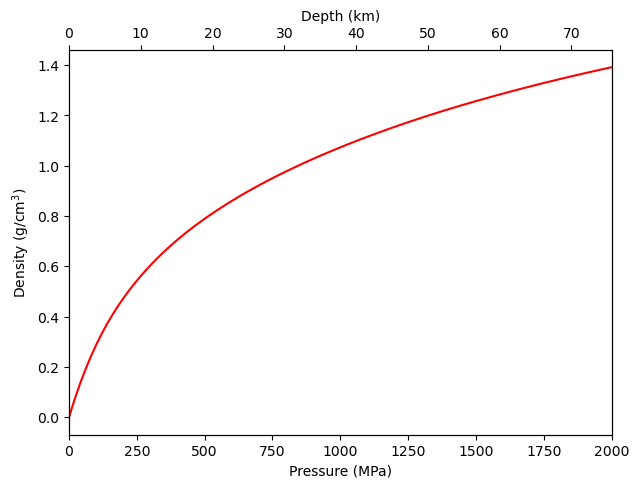

In [5]:
fig, (ax1) = plt.subplots(1, 1, figsize=(7,5))
ax1.plot(100*P_combo*10**(-8), CalcD_P_1200/1000, '-', color='red')
ax5 = ax1.twiny()
ax1.set_xlabel('Pressure (MPa)')
ax1.set_ylabel('Density (g/cm$^{3}$)')
ax5.set_xlim([D_axis_min, D_axis_max])
ax1.set_xlim([P_axis_min*100, P_axis_max*100])
ax5.set_xlabel('Depth (km)')
fig.savefig('Pressure_Depth.png')